<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/%5B20241124%5D%20Hybrid%20combination%20of%20LR-Bi-LSTM%20for%2010%20class%20classifications%20with%20FGSM%20on%20UNSW-NB15%200.2drop(25ep).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Hybrid LR-Bi-LSTM for 10 class classifications based on UNSW-NB15 dataset**

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout, Flatten
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load dataset
dataset = pd.read_csv("Dataset_10Classes.csv")

# Preprocessing: Handle missing values (if any)
dataset = dataset.dropna() # Remove missing values
#X = dataset.drop(['Class'], axis=1)
#y = dataset['Class']

### **Data Preprocessing**

In [3]:
# Encode non-numeric columns (if any)
for column in dataset.columns:
    if dataset[column].dtype == 'object':  # Identify categorical columns
        dataset[column] = LabelEncoder().fit_transform(dataset[column])

# Separate features (X) and target (y)
X = dataset.drop(['Class'], axis=1)  # Assuming 'Class' is the target column
y = dataset['Class']

In [4]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### **Hybrid combination of LR-Bi-LSTM for 10 class classifications on UNSW-NB15**

In [19]:
# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=800, random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#print("\nConfusion Matrix:")
#print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.9997477442514796

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18600
           1       1.00      1.00      1.00       535
           2       1.00      1.00      1.00       466
           3       1.00      1.00      1.00      3271
           4       1.00      1.00      1.00      8905
           5       1.00      1.00      1.00      4849
           6       1.00      1.00      1.00     11774
           7       1.00      1.00      1.00      2798
           8       0.98      1.00      0.99       302
           9       1.00      0.83      0.91        35

    accuracy                           1.00     51535
   macro avg       1.00      0.98      0.99     51535
weighted avg       1.00      1.00      1.00     51535



In [6]:
from keras.utils import to_categorical

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=800, random_state=42)
lr_model.fit(X_train, y_train)

# Extract probabilities from LR model
train_lr_features = lr_model.predict_proba(X_train)  # Features for Bi-LSTM from training data
test_lr_features = lr_model.predict_proba(X_test)    # Features for Bi-LSTM from test data

# Reshape LR features for Bi-LSTM input
train_lr_features = np.expand_dims(train_lr_features, axis=1)
test_lr_features = np.expand_dims(test_lr_features, axis=1)

# Convert labels to one-hot encoding for Bi-LSTM
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [35]:
# Build the Bi-LSTM model
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(1, train_lr_features.shape[2])))
bilstm_model.add(Dropout(0.5))
bilstm_model.add(Bidirectional(LSTM(32)))
bilstm_model.add(Dropout(0.5))
bilstm_model.add(Dense(10, activation='softmax'))  # 10 classes

bilstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the Bi-LSTM model
history = bilstm_model.fit(
    train_lr_features, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    verbose=1
)

# Evaluate the hybrid model on the test set
test_predictions = bilstm_model.predict(test_lr_features)
test_predictions_labels = np.argmax(test_predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Performance metrics
accuracy = accuracy_score(true_labels, test_predictions_labels)
print("\nHybrid Model Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(true_labels, test_predictions_labels))
print("\nConfusion Matrix:")
print(confusion_matrix(true_labels, test_predictions_labels))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
2577/2577 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - accuracy: 0.9215 - loss: 0.3627 - val_accuracy: 0.9998 - val_loss: 0.0015
Epoch 2/50
2577/2577 ━━━━━━━━━━━━━━━━━━━━ 40s 8ms/step - accuracy: 0.9996 - loss: 0.0025 - val_accuracy: 0.9999 - val_loss: 8.9397e-04
Epoch 3/50
2577/2577 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.9998 - loss: 0.0017 - val_accuracy: 0.9998 - val_loss: 0.0010
Epoch 4/50
2577/2577 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.9998 - loss: 0.0021 - val_accuracy: 0.9998 - val_loss: 8.9468e-04
Epoch 5/50
2577/2577 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - accuracy: 0.9998 - loss: 0.0011 - val_accuracy: 0.9998 - val_loss: 0.0013
Epoch 6/50
2577/2577 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.9997 - loss: 0.0014 - val_accuracy: 0.9999 - val_loss: 8.1548e-04
Epoch 7/50
2577/2577 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.9998 - loss: 0.0014 - val_accuracy: 0.9998 - val_loss: 9.2503e-04
Epoch 8/50
2577/2577 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 

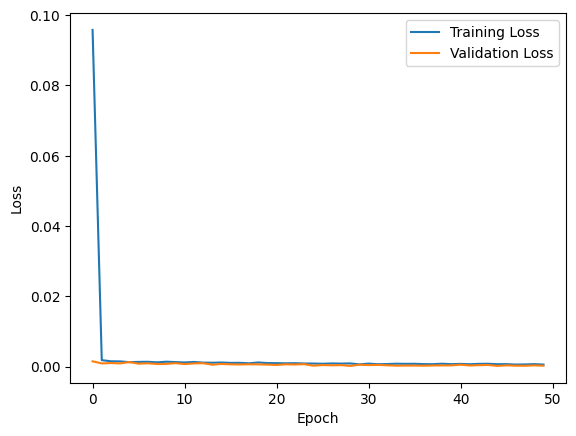

In [44]:
# Plot training and validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [45]:
# Performance metrics
accuracy = accuracy_score(true_labels, test_predictions_labels)
precision = precision_score(true_labels, test_predictions_labels, average='macro')
recall = recall_score(true_labels, test_predictions_labels, average='macro')
f1 = f1_score(true_labels, test_predictions_labels, average='macro')

print("\nHybrid Model Accuracy:", accuracy)
print("\nPrecision:", precision)
print("\nRecall:", recall)
print("\nF1-Score:", f1)


Hybrid Model Accuracy: 0.9998641699815659

Precision: 0.9962090607732226

Recall: 0.9910325896874767

F1-Score: 0.9935390630481675


In [46]:
# Classification report
print("\nClassification Report:")
print(classification_report(true_labels, test_predictions_labels))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18600
           1       1.00      1.00      1.00       535
           2       1.00      1.00      1.00       466
           3       1.00      1.00      1.00      3271
           4       1.00      1.00      1.00      8905
           5       1.00      1.00      1.00      4849
           6       1.00      1.00      1.00     11774
           7       1.00      1.00      1.00      2798
           8       0.99      1.00      1.00       302
           9       0.97      0.91      0.94        35

    accuracy                           1.00     51535
   macro avg       1.00      0.99      0.99     51535
weighted avg       1.00      1.00      1.00     51535



In [47]:
# Detection Rate (Recall for each class)
detection_rate = recall_score(true_labels, test_predictions_labels, average=None)
for i in range(len(detection_rate)):
    print(f"Detection Rate for Class {i}: {detection_rate[i]:.10f}")

Detection Rate for Class 0: 1.0000000000
Detection Rate for Class 1: 1.0000000000
Detection Rate for Class 2: 1.0000000000
Detection Rate for Class 3: 1.0000000000
Detection Rate for Class 4: 1.0000000000
Detection Rate for Class 5: 0.9997937719
Detection Rate for Class 6: 0.9999150671
Detection Rate for Class 7: 0.9996426019
Detection Rate for Class 8: 0.9966887417
Detection Rate for Class 9: 0.9142857143


**With FGSM adversarial training**

In [16]:
import tensorflow as tf

#Build the Bi-LSTM model
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(1, train_lr_features.shape[2])))
bilstm_model.add(Dropout(0.2))
bilstm_model.add(Bidirectional(LSTM(32)))
bilstm_model.add(Dropout(0.2))
bilstm_model.add(Dense(10, activation='softmax'))

bilstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# FGSM: Function to generate adversarial examples
def generate_adversarial_examples(model, data, labels, epsilon=0.1):
    data_tensor = tf.convert_to_tensor(data, dtype=tf.float32)
    labels_tensor = tf.convert_to_tensor(labels, dtype=tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(data_tensor)
        predictions = model(data_tensor)
        loss = tf.keras.losses.categorical_crossentropy(labels_tensor, predictions)

    gradients = tape.gradient(loss, data_tensor)
    perturbations = epsilon * tf.sign(gradients)
    adversarial_data = data_tensor + perturbations

    return adversarial_data.numpy()

# Generate adversarial examples for training
adversarial_train_features = generate_adversarial_examples(bilstm_model, train_lr_features, y_train)

# Combine original and adversarial examples
combined_train_features = np.concatenate((train_lr_features, adversarial_train_features), axis=0)
combined_train_labels = np.concatenate((y_train, y_train), axis=0)

# Train the Bi-LSTM model
history = bilstm_model.fit(
    combined_train_features, combined_train_labels,
    validation_split=0.2,
    epochs=25,
    batch_size=64,
    verbose=1
)

# Evaluate the model
test_predictions = bilstm_model.predict(test_lr_features)
test_predictions_labels = np.argmax(test_predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Metrics and results
accuracy = accuracy_score(true_labels, test_predictions_labels)
print("\nHybrid Model Accuracy with FGSM:", accuracy)
print("\nClassification Report:")
print(classification_report(true_labels, test_predictions_labels))
print("\nConfusion Matrix:")
print(confusion_matrix(true_labels, test_predictions_labels))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
5154/5154 ━━━━━━━━━━━━━━━━━━━━ 52s 8ms/step - accuracy: 0.9650 - loss: 0.1999 - val_accuracy: 0.9998 - val_loss: 7.0645e-04
Epoch 2/25
5154/5154 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.9998 - loss: 0.0010 - val_accuracy: 0.9999 - val_loss: 5.6983e-04
Epoch 3/25
5154/5154 ━━━━━━━━━━━━━━━━━━━━ 83s 8ms/step - accuracy: 0.9998 - loss: 9.9316e-04 - val_accuracy: 1.0000 - val_loss: 1.3843e-04
Epoch 4/25
5154/5154 ━━━━━━━━━━━━━━━━━━━━ 80s 8ms/step - accuracy: 0.9998 - loss: 8.7830e-04 - val_accuracy: 1.0000 - val_loss: 1.0744e-04
Epoch 5/25
5154/5154 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.9998 - loss: 8.3103e-04 - val_accuracy: 1.0000 - val_loss: 1.0608e-04
Epoch 6/25
5154/5154 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.9998 - loss: 6.8350e-04 - val_accuracy: 1.0000 - val_loss: 1.0827e-04
Epoch 7/25
5154/5154 ━━━━━━━━━━━━━━━━━━━━ 40s 8ms/step - accuracy: 0.9999 - loss: 6.8816e-04 - val_accuracy: 1.0000 - val_loss: 9.1913e-05
Epoch 8/25
5154/5154 ━━━━━━━━━━━━━━

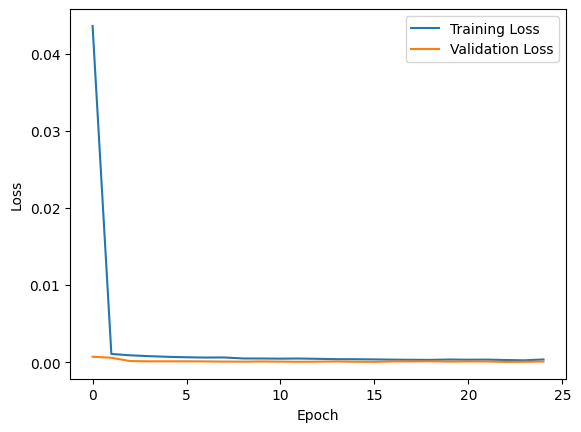

In [17]:
# Plot training and validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
# Performance metrics
accuracy = accuracy_score(true_labels, test_predictions_labels)
precision = precision_score(true_labels, test_predictions_labels, average='macro')
recall = recall_score(true_labels, test_predictions_labels, average='macro')
f1 = f1_score(true_labels, test_predictions_labels, average='macro')

print("\nHybrid Model Accuracy:", accuracy)
print("\nPrecision:", precision)
print("\nRecall:", recall)
print("\nF1-Score:", f1)


Hybrid Model Accuracy: 0.9998835742699137

Precision: 0.9989515502981223

Recall: 0.9885423124723014

F1-Score: 0.9933981771885584


In [19]:
# Detection Rate (Recall for each class)
detection_rate = recall_score(true_labels, test_predictions_labels, average=None)
for i in range(len(detection_rate)):
    print(f"Detection Rate for Class {i}: {detection_rate[i]:.10f}")

Detection Rate for Class 0: 1.0000000000
Detection Rate for Class 1: 1.0000000000
Detection Rate for Class 2: 1.0000000000
Detection Rate for Class 3: 1.0000000000
Detection Rate for Class 4: 1.0000000000
Detection Rate for Class 5: 0.9997937719
Detection Rate for Class 6: 0.9999150671
Detection Rate for Class 7: 1.0000000000
Detection Rate for Class 8: 1.0000000000
Detection Rate for Class 9: 0.8857142857
